<a href="https://colab.research.google.com/github/Shambhavi-Gupta/Logistic-regression-on-adult-dataset/blob/master/Logistic_Regression_adult_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. LOADING THE DATA

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('file/adult.csv')

# 2. UNDERSTANDING AND VISUALISING THE DATA


In [0]:
print(df.shape)

(48842, 16)


In [0]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'Income'],
      dtype='object')

In [0]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0


In [0]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,Income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [0]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,Income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
Income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


In [0]:
print(df.gender.value_counts())


Male      32650
Female    16192
Name: gender, dtype: int64


In [0]:
df.replace('?',np.NaN, inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,0


In [0]:
print(df.occupation.value_counts())


Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


In [0]:
print(df.workclass.value_counts())


Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


In [0]:
df.drop(['capital-gain','capital-loss'], axis=1)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0


In [0]:
df.dropna(how='all')


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [0]:
df.dropna(inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0


In [0]:
df.drop(['capital-gain','capital-loss'], axis=1)



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0


In [0]:
x = df[['age', 'educational-num', 'hours-per-week']]
y = df['income']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, \
                                                   y, \
                                                   test_size = 0.25, \
                                                   random_state = 0)


In [0]:
x = df[['age', 'educational-num', 'hours-per-week']]
y = df['income']


In [0]:
from sklearn.preprocessing import StandardScaler ;
X_train,X_test,y_train,y_test=train_test_split(StandardScaler().fit_transform(X),y,test_size=0.33,random_state=42)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, \
                                                   y, \
                                                   test_size = 0.25, \
                                                   random_state = 0)


In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)





LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
 y_pred = classifier.predict(X_test)


In [0]:
prediction = classifier.predict_proba(X_test)

np.around(prediction, decimals = 2)


array([[0.7 , 0.3 ],
       [0.57, 0.43],
       [0.77, 0.23],
       ...,
       [0.7 , 0.3 ],
       [0.22, 0.78],
       [0.48, 0.52]])

In [0]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)



0.7800283035556341

In [0]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion


array([[7885,  582],
       [1905,  934]], dtype=int64)

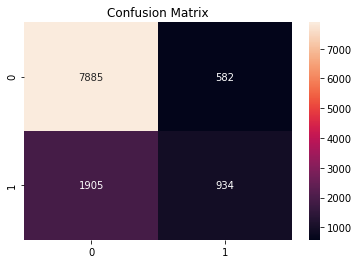

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [0]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Income']= label_encoder.fit_transform(df['income']) 
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
5   34    Private  198693          10th                6       Never-married   

          occupation   relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black   Male             0             0   
1    Farming-fishing        Husband  White   Male             0             0   
2    Protective-serv        Husband  White   Male             0             0   
3  Machine-op-inspct        Husband  Black   Male          7688             0   
5      Other-service  Not-in-family  White   Male             0             0   

   hours-per-week native-country

In [0]:
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       <=50K       0.81      0.93      0.86      8467
        >50K       0.62      0.33      0.43      2839

    accuracy                           0.78     11306
   macro avg       0.71      0.63      0.65     11306
weighted avg       0.76      0.78      0.75     11306



# DUMMY VARIABLES

In [0]:
print("Original features:\n", list(df.columns), "\n")
df_dummies = pd.get_dummies(df)
print("Features after get_dummies:\n", list(df_dummies.columns))


Original features:
 ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income', 'Income'] 

Features after get_dummies:
 ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'Income', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Mar

In [0]:
df_dummies.head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,Income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
5,34,198693,6,0,0,30,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [0]:
features = df_dummies.loc[:, 'age':'occupation_Adm-clerical']


# EXTRACT NUMPY ARRAYS

In [0]:
X = features.values
y = df_dummies['income_>50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))


X.shape: (45222, 38)  y.shape: (45222,)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))



Test score: 0.78


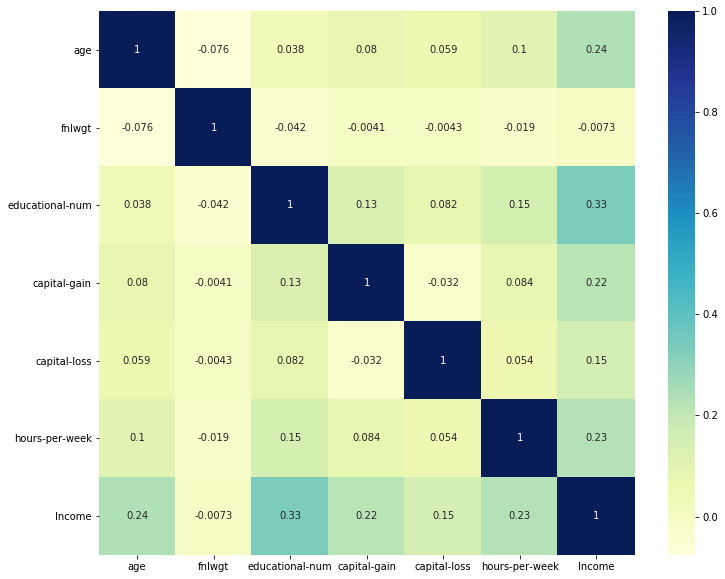

In [0]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()


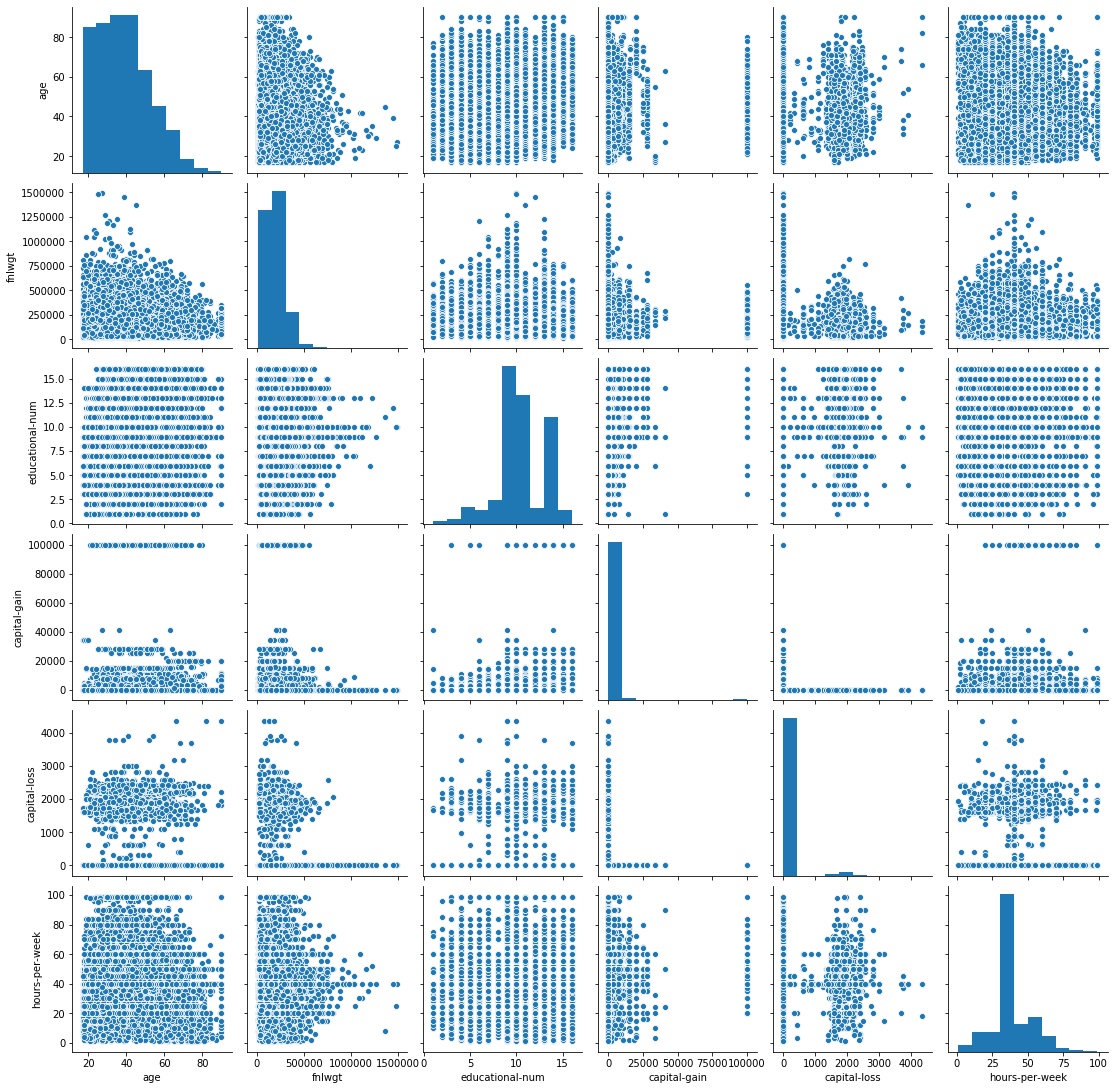

In [0]:
sns.pairplot(df)

In [0]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'Income'],
      dtype='object')

# RECURSIVE FEATURE ELIMINATION

In [0]:
from sklearn.linear_model import LinearRegression
regressor_temp = LinearRegression()


In [0]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor_temp, 5)
rfe = rfe.fit(X_train, y_train)


In [0]:
temp_df = pd.DataFrame({'columns' : features.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df


,columns,Included,Ranking
0,age,False,31
1,fnlwgt,False,34
2,educational-num,False,7
3,capital-gain,False,33
4,capital-loss,False,32
5,hours-per-week,False,29
6,Income,True,1
7,workclass_Federal-gov,False,22
8,workclass_Local-gov,False,23
9,workclass_Private,False,21


In [0]:
imp_col=features.columns[rfe.support_]
imp_col

Index(['Income', 'marital-status_Divorced',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'marital-status_Separated'],
      dtype='object')

In [0]:
X_train_new=features[imp_col]
X_train_new.head()

,Income,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,marital-status_Separated
0,0,0,0,1,0
1,0,0,1,0,0
2,1,0,1,0,0
3,1,0,1,0,0
5,0,0,0,1,0


In [0]:
from sklearn.linear_model import LinearRegression
regressor_new=LinearRegression()
regressor_new.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_train_pred=regressor_new.predict(X_train)

In [0]:
X_train_new =[imp_col]

y_train_pred = regressor_new.predict(X_train)

In [0]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error:  0.2672009318280792
Mean Squared Error:  0.11954841529347356
Root Mean Squared Error:  0.34575774075712834


In [0]:
print(metrics.r2_score(y_train, y_train_pred))

0.3463567413882107


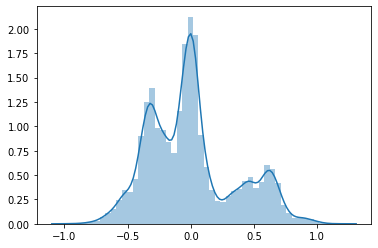

In [0]:
residual_train = y_train - y_train_pred

sns.distplot(residual_train)

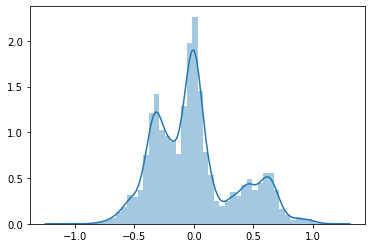

In [0]:
residual_test=y_test-y_test_pred
sns.distplot(residual_test)

In [0]:
y_test_pred=regressor_new.predict(X_test)

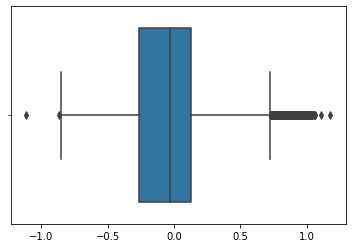

In [0]:
sns.boxplot(residual_test)

In [0]:
temp_df=pd.DataFrame({'Actual':y_test,'predicted':y_test_pred})
temp_df

,Actual,predicted
0,0,0.048470
1,0,0.276924
2,1,0.354195
3,0,0.301216
4,0,0.515450
...,...,...
16113,0,0.320503
16114,0,0.081612
16115,1,0.386299
16116,0,0.036324


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df_train,df_test=train_test_split(df,  train_size=0.8,  \
                                                          random_state = 0)
print(df_train.shape)
print(df_test.shape)


(39073, 15)
(9769, 15)


In [0]:
y_train=df_train.pop('capital-gain')
X_train=df_train

In [0]:
X_train.dropna(inplace=True)
X_train.head

C:\Users\compaq\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<bound method NDFrame.head of        age         workclass  fnlwgt     education  educational-num  \
8650    42           Private  180985     Assoc-voc               11   
26605   35         State-gov  483530  Some-college               10   
2516    24           Private  354351     Bachelors               13   
6663    34           Private  163581       HS-grad                9   
4430    33         State-gov  160261     Bachelors               13   
...    ...               ...     ...           ...              ...   
30403   31         State-gov  123037  Some-college               10   
21243   31           Private  153078    Assoc-acdm               12   
45891   60           Private  399387       7th-8th                4   
43567   29  Self-emp-not-inc   85572          11th                7   
2732    59         State-gov  136819       Masters               14   

           marital-status       occupation   relationship                race  \
8650   Married-civ-spouse     Craft-

In [0]:
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       <=50K       0.81      0.94      0.87      9273
        >50K       0.61      0.32      0.42      2938

    accuracy                           0.79     12211
   macro avg       0.71      0.63      0.64     12211
weighted avg       0.76      0.79      0.76     12211

